In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [2]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [3]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf2,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


[13.33333333  0.96666667]
[10.     0.975]


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

[13.90909091  0.96909091]
[9.   0.98]
[8.18181818 0.98181818]
[4.90909091 0.98909091]
[3.27272727 0.99272727]
[3.27272727 0.99272727]
[3.27272727 0.99272727]
[2.45454545 0.99454545]
[2.45454545 0.99454545]


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


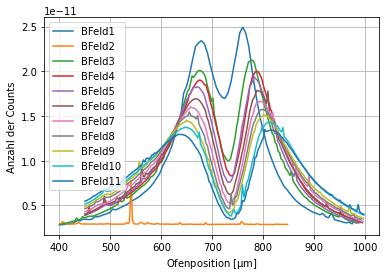

In [4]:
xcalib = [(400,1000),(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(400,985),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

for  i in range(len(xcalib)):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    print(popt)
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)